this is the machin learning project 

In [295]:
import pandas as pd 
import numpy as np
from scipy.cluster.vq import whiten
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import  KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score ,classification_report
from sklearn.neighbors import KNeighborsClassifier
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [296]:
hosing = pd.read_csv(r'C:\Users\SunInternet.ir\Desktop\data\housing.csv')

In [297]:
hosing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [298]:
hosing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [299]:
df = hosing._get_numeric_data()

In [300]:
df[:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0


In [301]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [302]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [303]:
df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

In [304]:
meand_dedrooms = df['total_bedrooms'].median()

In [305]:
print(f'this is the meadian { meand_dedrooms }')

this is the meadian 435.0


In [306]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(meand_dedrooms)

In [307]:
df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

In [308]:
df.value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value
-124.35    40.54     52.0                1820.0       300.0           806.0       270.0       3.0147         94600.0               1
-118.18    33.77     39.0                1645.0       547.0           1339.0      499.0       1.5536         155000.0              1
-118.19    34.12     46.0                3387.0       820.0           2833.0      813.0       2.9870         176900.0              1
                     44.0                1219.0       324.0           1036.0      282.0       4.0417         170600.0              1
                     41.0                2591.0       682.0           2366.0      583.0       2.3071         146400.0              1
                                                                                                                                  ..
-121.19    38.87     20.0                3118.0       500.0           1405

In [309]:
df.values

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  4.5260e+05],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.5850e+05],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.5210e+05],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  9.2300e+04],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  8.4700e+04],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  8.9400e+04]])

In [310]:
scale = StandardScaler()

X = df.values

scale.fit_transform(X)
 

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  2.12963148],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  1.31415614],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  1.25869341],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331, -0.99274649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292, -1.05860847],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947, -1.01787803]])

In [311]:
# df = whiten(df)

In [312]:
# print(f' this is the data after the whitenize {df[:5]}')

In [313]:
data = pd.DataFrame({
    'A': np.random.randint(1, 100, 100),
    'B': np.random.rand(100)
})

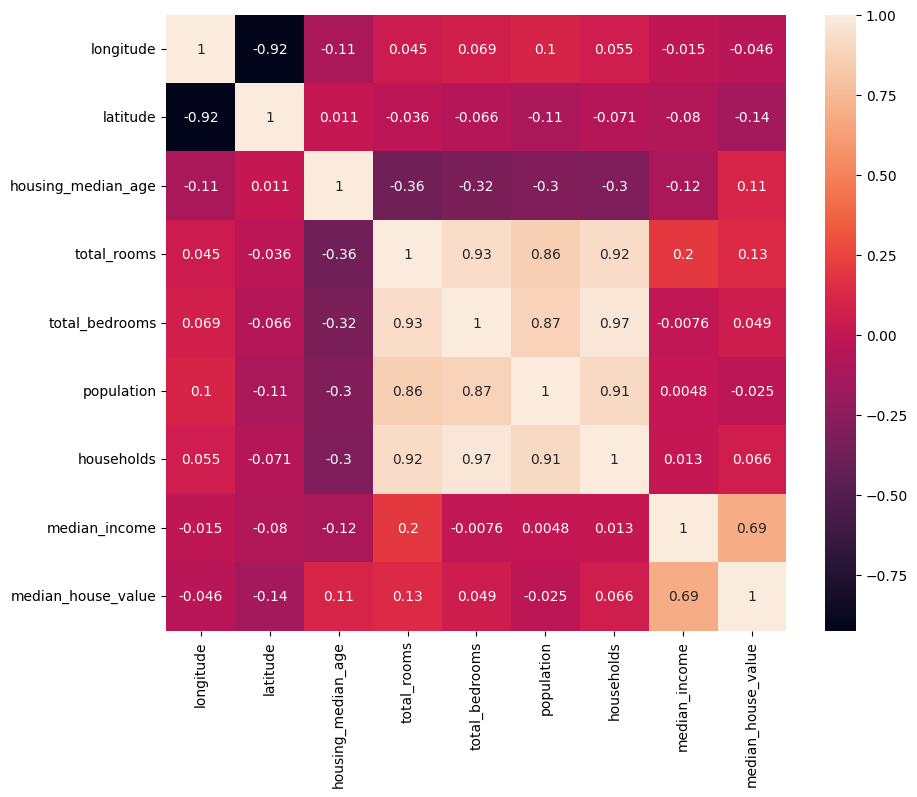

In [314]:
numeric_df = df

corr_matrix = numeric_df.corr()
    
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

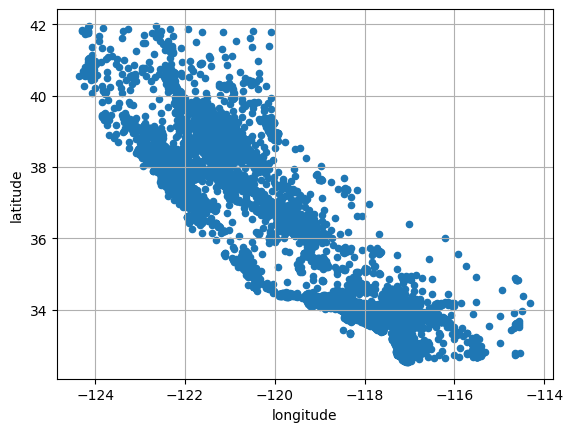

In [315]:
df.plot(kind="scatter", x="longitude", y="latitude", grid=True)

plt.show()

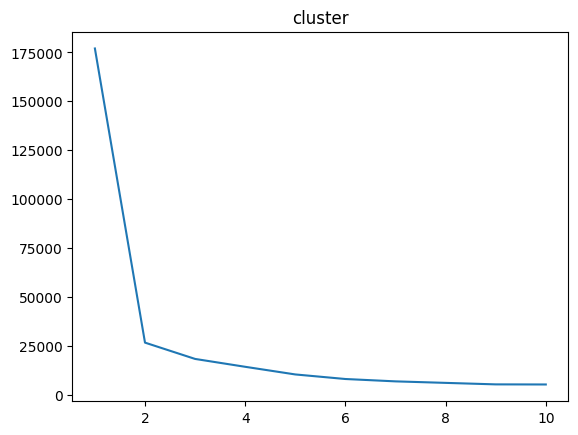

In [316]:
data = df[['latitude','longitude']]
list1 = []

for i in range(1,11):
    kamen = KMeans(n_clusters=i)
    kamen.fit(data)
    list1.append(kamen.inertia_)
    
    
plt.plot(range(1,11),list1)
plt.title('cluster')
plt.show()
    

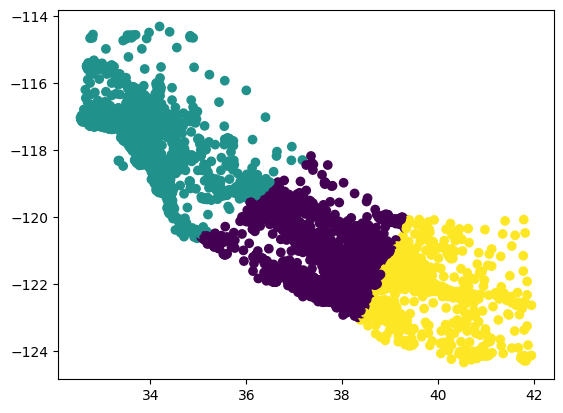

In [317]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['latitude', 'longitude']])

cluster_labels = kmeans.labels_

plt.scatter(df['latitude'], df['longitude'], c=cluster_labels, cmap='viridis')
plt.show()

In [318]:
X = df[['longitude', 'latitude']]
y = df['median_income']

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [320]:
clf = DecisionTreeClassifier(random_state=42)
# clf.fit(X_train, y_train)


In [322]:
knn = KNeighborsClassifier(n_neighbors=5)  


In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
y_pred

array([2, 4, 6, ..., 1, 3, 3])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.36603682170542634


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.27      0.10      0.15        30
           1       0.45      0.52      0.48       469
           2       0.40      0.52      0.45       941
           3       0.37      0.42      0.39      1003
           4       0.34      0.27      0.30       742
           5       0.29      0.20      0.24       443
           6       0.23      0.18      0.20       239
           7       0.20      0.08      0.11       130
           8       0.21      0.13      0.16        62
           9       0.00      0.00      0.00        19
          10       0.06      0.04      0.05        27
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2
          15       0.25      0.20      0.22         5

    accuracy                           0.37      4128
   macro avg       0.19   

c:\Users\SunInternet.ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SunInternet.ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SunInternet.ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [ ]:

data['combined'] = data.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

print(data['combined'].head())


0    37.88 -122.23 37.88 -122.23 37.88 -122.23
1    37.86 -122.22 37.86 -122.22 37.86 -122.22
2    37.85 -122.24 37.85 -122.24 37.85 -122.24
3    37.85 -122.25 37.85 -122.25 37.85 -122.25
4    37.85 -122.25 37.85 -122.25 37.85 -122.25
Name: combined, dtype: object


C:\Users\SunInternet.ir\AppData\Local\Temp\ipykernel_1892\4190879230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['combined'] = data.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SunInternet.ir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data['tokens'] = data['combined'].apply(word_tokenize)

C:\Users\SunInternet.ir\AppData\Local\Temp\ipykernel_1892\1033629914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokens'] = data['combined'].apply(word_tokenize)


In [ ]:
all_words = [word for tokens in data['tokens'] for word in tokens]
freq_dist = FreqDist(all_words)

In [ ]:
print(freq_dist.most_common(10))

[('34.06', 732), ('34.05', 708), ('34.08', 702), ('34.07', 693), ('34.04', 663), ('34.09', 636), ('34.02', 624), ('34.1', 609), ('34.03', 579), ('33.93', 543)]


In [ ]:

def score_text(tokens, freq_dist):
    return sum(freq_dist[word] for word in tokens)

data['score'] = data['tokens'].apply(lambda tokens: score_text(tokens, freq_dist))


data = data.sort_values(by='score', ascending=False)


print(f"This is the data {data[['combined', 'score']].head()}")

This is the data                                         combined  score
5486   34.06 -118.31 34.06 -118.31 34.06 -118.31   3654
2127   34.06 -118.31 34.06 -118.31 34.06 -118.31   3654
6544   34.06 -118.31 34.06 -118.31 34.06 -118.31   3654
19410  34.06 -118.31 34.06 -118.31 34.06 -118.31   3654
8787   34.06 -118.31 34.06 -118.31 34.06 -118.31   3654


In [ ]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Mean Squared Error (Linear Regression): {mse_linear}")


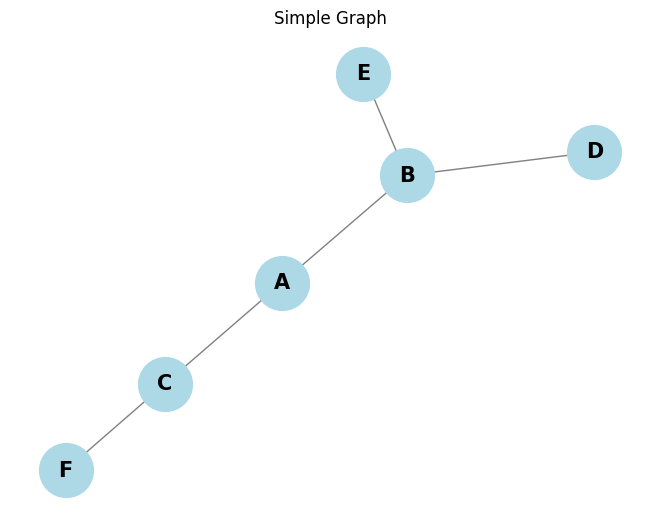

BFS traversal starting from node A: ['A', 'B', 'C', 'D', 'E', 'F']
DFS traversal starting from node A: ['A', 'B', 'D', 'E', 'C', 'F']


In [324]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()


nodes = ['A', 'B', 'C', 'D', 'E', 'F']
G.add_nodes_from(nodes)

edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F')]
G.add_edges_from(edges)


pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=15, font_weight='bold', edge_color='grey')
plt.title('Simple Graph')
plt.show()


start_node = 'A'
bfs_result = list(nx.bfs_tree(G, start_node))
print(f"BFS traversal starting from node {start_node}: {bfs_result}")

dfs_result = list(nx.dfs_preorder_nodes(G, source=start_node))
print(f"DFS traversal starting from node {start_node}: {dfs_result}")
